## Feature Engineering
Creating and transforming features to get the most out of the data

For example:
. adding the length of the text.
. adding a percentage of punctuation.
. adding the Coleman-Liau index (check "cs50 readability", "Traditional Readability Formulas Compared for English" and "*LLM readability assessment*")

## Types of transformations
. standardizing (for instance, when we have a long tail of outliers, we can use a log transformation to "pull" the tail closer to the bulk of the data)

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

In [14]:
# number of characters excluding whitespace
#body_len = data['body_text'].apply(lambda x: len(x) - x.count(' '))
body_len = data['body_text'].str.replace(' ', '').str.len()
data['body_len'] = body_len

In [20]:
# punctuation percentage
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count / (len(text) - text.count(' ')) * 100
data['punct%'] = data['body_text'].apply(count_punct)

In [51]:
from nltk.tokenize import sent_tokenize, word_tokenize

def coleman_liau_index(text):
    n_sent = len(sent_tokenize(text))
    n_words = len(word_tokenize(text))
    n_letters = len(text) - text.count(' ')
    return 5.88 * (n_letters/n_words) - 29.6 * (n_sent/n_words) - 15.8
data['cl_index'] = data['body_text'].apply(coleman_liau_index)

In [52]:
data

,label,body_text,body_len,punct%,cl_index
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.687500,2.941622
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.081633,1.434667
2,ham,Even my brother is not like to speak with me. ...,62,3.225806,1.164444
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.142857,-5.256000
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.444444,7.896774
...,...,...,...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u...,131,6.106870,2.825143
5563,ham,Will ü b going to esplanade fr home?,29,3.448276,-0.142222
5564,ham,"Pity, * was in mood for that. So...any other s...",48,14.583333,-0.930667
5565,ham,The guy did some bitching but I acted like i'd...,100,1.000000,4.881481


## Evaluate you features!

In [53]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

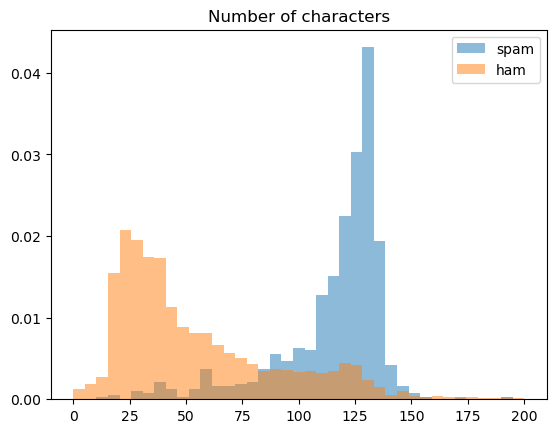

In [54]:
bins = np.linspace(0, 200, 40)
plt.hist(data[data['label'] == 'spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label'] == 'ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend()
plt.title("Number of characters")
plt.show()

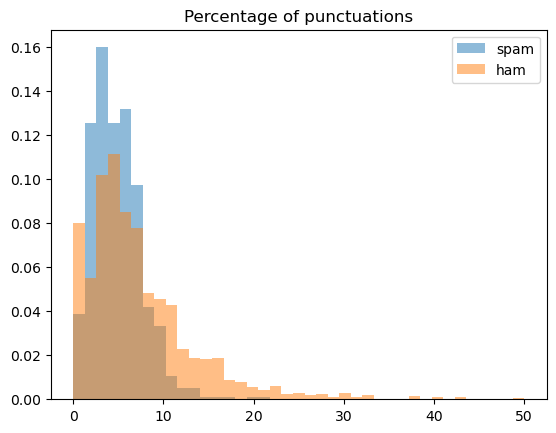

In [55]:
bins = np.linspace(0, 50, 40)
plt.hist(data[data['label'] == 'spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label'] == 'ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
plt.legend()
plt.title("Percentage of punctuations")
plt.show()

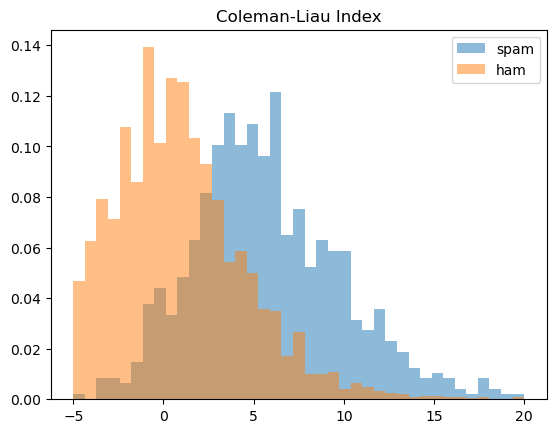

In [60]:
bins = np.linspace(-5, 20, 40)
plt.hist(data[data['label'] == 'spam']['cl_index'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label'] == 'ham']['cl_index'], bins, alpha=0.5, density=True, label='ham')
plt.legend()
plt.title("Coleman-Liau Index")
plt.show()

## Let's transform the punctuation values to agregate the outliers!
look into box-cox power transformation. Some models work better when the distribution is closer to normal curves.

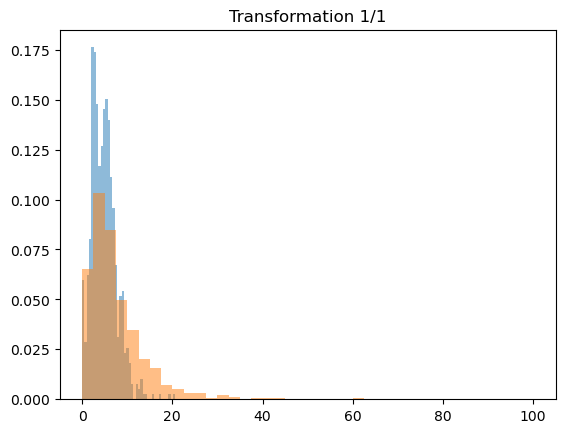

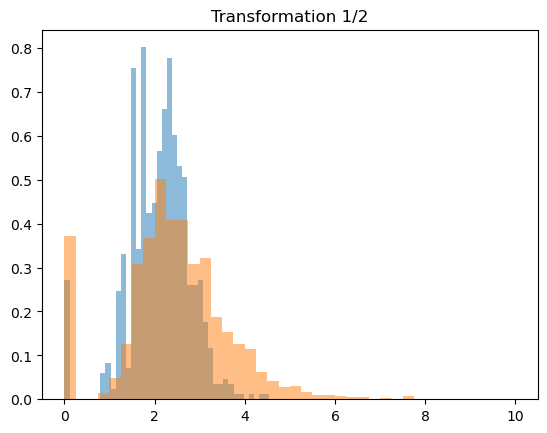

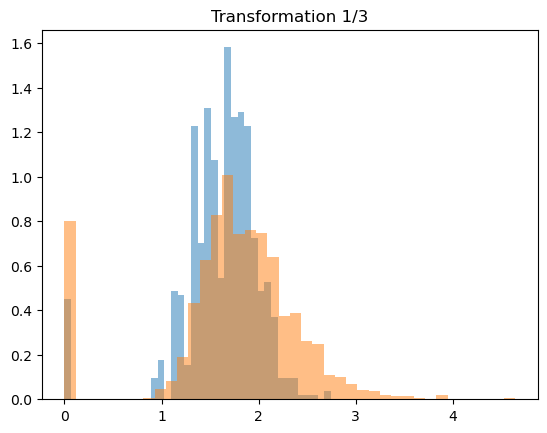

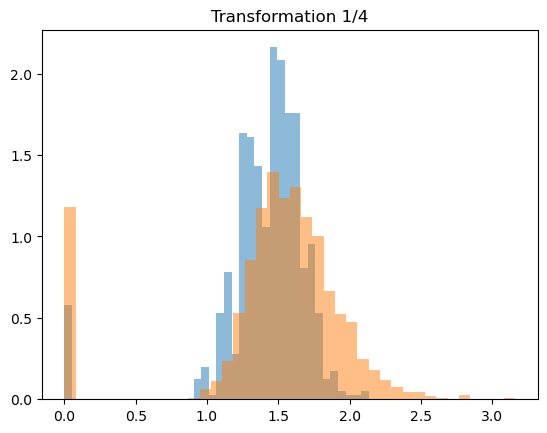

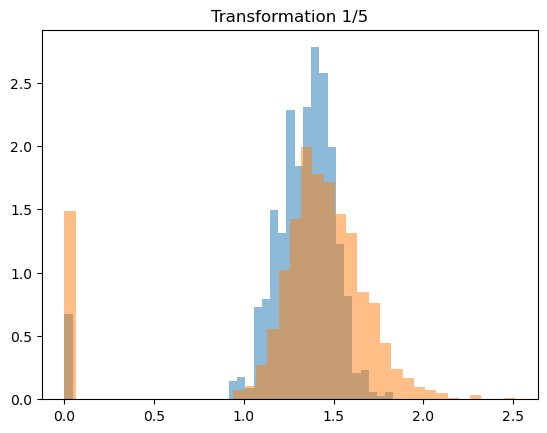

In [49]:
for i in [1,2,3,4,5]:
    plt.hist(data[data['label'] == 'spam']['punct%']**(1/i), bins=40, density=True, alpha=0.5)
    plt.hist(data[data['label'] == 'ham']['punct%']**(1/i), bins=40, density=True, alpha=0.5)
    plt.title(f"Transformation 1/{i}")
    plt.show()